In [134]:
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker as mticker
from sqlalchemy import PickleType

import sys
sys.path.append("../")
from utils.data_storage.dataframe2sql import read_pkl_sql
from utils.config.loaders import get_sql_types


sns.set_theme()
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

In [135]:
dtypes = get_sql_types()
dtypes["value_history"] = PickleType

In [136]:
con = sql.connect("benchmarks.db")

In [137]:
con.cursor().execute("SELECT name FROM sqlite_master where type = 'table'").fetchall()

[('camel_scan',)]

In [138]:
df = read_pkl_sql("benchmarks.db", "camel_scan", dtypes=dtypes)
df.columns = df.columns.astype(str)
clean_df = df.dropna(subset=["variance_ratio", "s"]).sort_values("variance_ratio", ascending=False)
clean_df["d_cat"] = clean_df["d"].astype(str)
matched = clean_df[clean_df["match"]] # & (clean_df["masking"] == "checkerboard")
better = matched.groupby(["d","s"]).head(20)
best = matched.groupby(["d","s"]).head(1)

In [141]:
df = df.assign(lvr=df["variance_ratio"].apply(np.log10),
              lval=df["value"].apply(np.log10))

In [142]:
df2 = df.set_index(["d","s"])

/scratch/ndeutsch/zunis/zunis.v/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
/scratch/ndeutsch/zunis/zunis.v/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


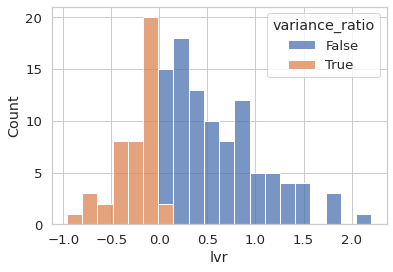

In [143]:
ax=sns.histplot(data=df2.loc[16,0.3].where(df2.loc[16,0.3].variance_ratio>=0),x="lvr",hue=df2.loc[16,0.3].variance_ratio<1,bins=20,multiple="stack")
ax.set(yscale="linear")
plt.show()

/scratch/ndeutsch/zunis/zunis.v/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
/scratch/ndeutsch/zunis/zunis.v/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


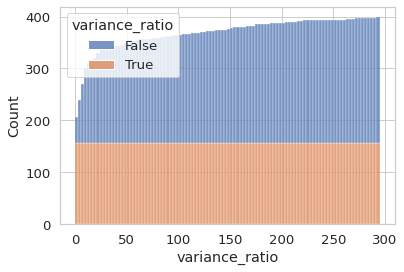

In [144]:
ax=sns.histplot(data=df2.loc[4,0.1].where(df2.loc[4,0.1].variance_ratio<300),x="variance_ratio",hue=df2.loc[4,0.1].variance_ratio<1,bins=100,multiple="stack",cumulative=True)
plt.show()

In [145]:
df["s"].unique()

array([0.1, 0.3, 0.5, 0.7])

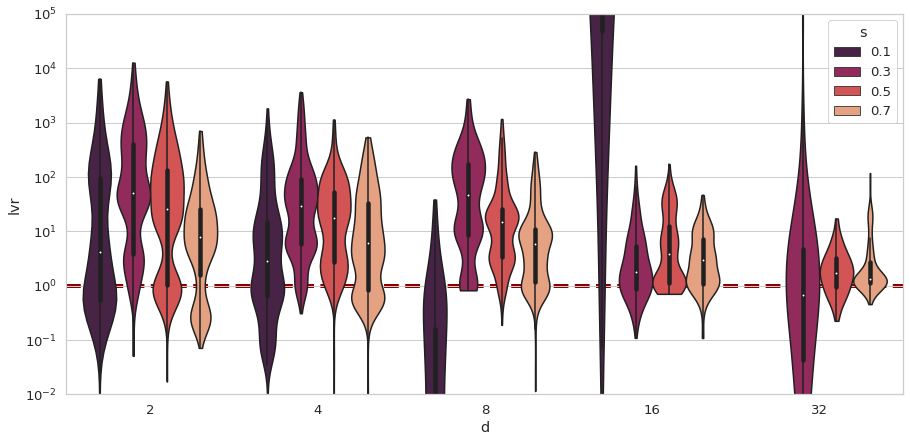

In [146]:
fig, ax = plt.subplots()
ax.plot([-.5,4.5],[0,0],c="darkred",ls="--",lw=4,zorder=0)
sns.violinplot(data=df, x="d",y="lvr", scale="width", hue="s", cut=0,palette="rocket", ax=ax)
fig.set_size_inches((15,7))
ax.set(xlim=[-.5,4.5], ylim=[-2,5])
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
plt.show()

/scratch/ndeutsch/zunis/zunis.v/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


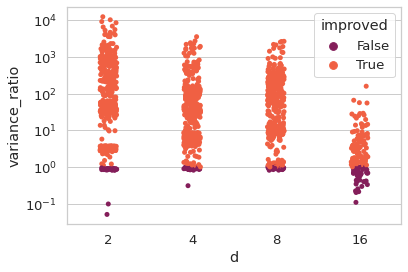

In [147]:
data = df.loc[(df["s"]==0.3) & (df["d"]<32)]
data["improved"] = (data["variance_ratio"]>1)
ax=sns.stripplot(data=data, x="d",y="variance_ratio",hue="improved",palette="rocket")
ax.set(yscale="log")
plt.show()

In [148]:
df["improved"] = df["variance_ratio"]>1

<AxesSubplot:xlabel='s', ylabel='d'>

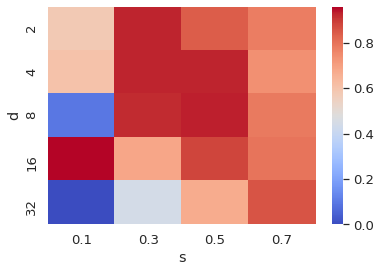

In [149]:
data = df.groupby(["d","s"])["improved"].mean().reset_index().pivot("d","s","improved")
sns.heatmap(data,cmap="coolwarm")

/scratch/ndeutsch/zunis/zunis.v/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='match', ylabel='lvr'>

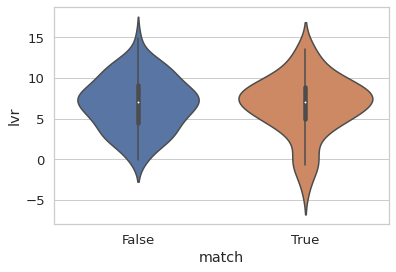

In [150]:
sns.violinplot(data=df2.loc[16,.1], y="lvr", x="match")

In [151]:
df1601 = df2.loc[16,.1]

/scratch/ndeutsch/zunis/zunis.v/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


In [152]:
df1601

value        target     value_std    target_std  sigma_cutoff  \
d  s                                                                           
16 0.1  3.586364e-17  5.153957e-13  2.696060e-17  1.288452e-13           3.0   
   0.1  8.108843e-20  9.991120e-13  5.627654e-20  3.602475e-13           3.0   
   0.1  7.810106e-16  6.624433e-13  7.715728e-16  1.368355e-13           3.0   
   0.1  1.086211e-13  6.691701e-13  1.086203e-13  1.082485e-13           3.0   
   0.1  1.510168e-18  9.761117e-13  1.492491e-18  2.310707e-13           3.0   
...              ...           ...           ...           ...           ...   
   0.1  1.339034e-17  4.813095e-13  1.326215e-17  7.781150e-14           3.0   
   0.1  4.328290e-15  1.108096e-12  4.250595e-15  3.898585e-13           3.0   
   0.1  4.597663e-13  6.058592e-13  4.597481e-13  1.965086e-13           3.0   
   0.1  8.491836e-17  9.966426e-13  6.634924e-17  6.049623e-14           3.0   
   0.1  1.005438e-15  9.618930e-13  5.485849e-16  2.609539e-14           3.0   

        sigmas_off  percent_difference  variance_ratio  match  \
d  s                                                            
16 0.1    3.999838          199.972168    2.283902e+07  False   
   0.1    2.773404          199.999968    4.097766e+13   True   
   0.1    4.835380          199.528961    3.145168e+04  False   
   0.1    3.655366          144.138675    9.931660e-01  False   
   0.1    4.224292          199.999381    2.396989e+10  False   
...            ...                 ...             ...    ...   
   0.1    6.185411          199.988872    3.442387e+07  False   
   0.1    2.831032          198.443655    8.412296e+03   True   
   0.1    0.292195           27.419175    1.826936e-01   True   
   0.1   16.473046          199.965921    8.313514e+05  False   
   0.1   36.813980          199.582328    2.262768e+03  False   

                                            value_history  ...           eps  \
d  s                                                       ...                 
16 0.1         integral         error  n_points   phas...  ...  1.000000e-08   
   0.1         integral         error  n_points   phas...  ...  1.000000e-08   
   0.1         integral         error  n_points   phas...  ...  1.000000e-08   
   0.1         integral         error  n_points   phas...  ...  1.000000e-08   
   0.1         integral         error  n_points   phas...  ...  1.000000e-08   
...                                                   ...  ...           ...   
   0.1         integral         error  n_points   phas...  ...  1.000000e-08   
   0.1         integral         error  n_points   phas...  ...  1.000000e-08   
   0.1         integral         error  n_points   phas...  ...  1.000000e-08   
   0.1         integral         error  n_points   phas...  ...  1.000000e-08   
   0.1         integral         error  n_points   phas...  ...  1.000000e-08   

             lr checkpoint  checkpoint_on_cuda  checkpoint_path  norm  \
d  s                                                                    
16 0.1  0.00050       True               False             None   1.0   
   0.1  0.00005       True               False             None   1.0   
   0.1  0.00005       True               False             None   1.0   
   0.1  0.00050       True               False             None   1.0   
   0.1  0.00050       True               False             None   1.0   
...         ...        ...                 ...              ...   ...   
   0.1  0.00050       True               False             None   1.0   
   0.1  0.00005       True               False             None   1.0   
   0.1  0.00005       True               False             None   1.0   
   0.1  0.00100       True               False             None   1.0   
   0.1  0.00001       True               False             None   1.0   

                                                 git_info  extra_data  \
d  s                                                            

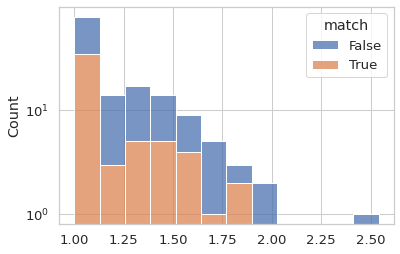

In [153]:
ax = sns.histplot(x=df1601["value"]/df1601["value_std"], hue=df1601["match"],multiple="stack")
ax.set(yscale="log")
plt.show()

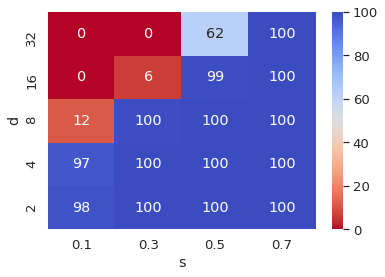

In [154]:
df["valid"] = df["value"] >= 20*df["value_std"]
data = df.groupby(["d","s"])["valid"].agg(lambda x: x.mean()*100).reset_index().pivot("d","s","valid").dropna()
ax = sns.heatmap(data,cmap="coolwarm_r", annot=True, fmt=".0f")
ax.invert_yaxis()
plt.show()

In [156]:
df2.loc[8,0.1].iloc[0]["value_history"]

/scratch/ndeutsch/zunis/zunis.v/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,integral,error,n_points,phase,training record
0,9.845385e-07,2.990538e-07,100000,survey,"[metrics, epochs, step, loss, best_loss]"
1,7.181441e-06,3.542966e-06,100000,survey,"[metrics, epochs, step, loss, best_loss]"
2,8.172228e-07,3.172766e-07,100000,survey,"[metrics, epochs, step, loss, best_loss]"
3,6.287991e-07,1.591629e-07,100000,survey,"[metrics, epochs, step, loss, best_loss]"
4,1.627458e-06,7.086520e-07,100000,survey,"[metrics, epochs, step, loss, best_loss]"
5,6.198664e-07,1.281384e-07,100000,survey,"[metrics, epochs, step, loss, best_loss]"
6,5.582467e-06,3.123218e-06,100000,survey,"[metrics, epochs, step, loss, best_loss]"
7,1.423813e-06,4.279962e-07,100000,survey,"[metrics, epochs, step, loss, best_loss]"
8,2.079600e-06,7.112781e-07,100000,survey,"[metrics, epochs, step, loss, best_loss]"
9,2.007799e-06,1.009061e-06,100000,survey,"[metrics, epochs, step, loss, best_loss]"
